In [2]:
from req import *

# Data Preparation

In [3]:
positive_df = pd.read_pickle('raw_positive.pkl')
negative_df = pd.read_pickle('raw_negative.pkl')

In [4]:
df = pd.concat([positive_df,negative_df], axis=0, ignore_index=True)
df.head()

,Comment,Rate,Seller,Date
0,NaN,5,DS ELEKTRONİK,2023-10-20
1,NaN,5,TRENDSHOPİNG34,2023-10-19
2,On numara urun,5,PRIME ONLINE,2023-10-17
3,1 yıldan fazladır kullanıyorum çok memnun kald...,5,Hepsiburada,2023-10-14
4,NaN,4,Çaçan Ticaret,2023-10-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103702 entries, 0 to 103701
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Comment  42552 non-null   object
 1   Rate     103702 non-null  object
 2   Seller   103644 non-null  object
 3   Date     103702 non-null  object
dtypes: object(4)
memory usage: 3.2+ MB


In [6]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Date'] = df['Date'].apply(time_it)
df['Rate'] = df['Rate'].apply(pd.to_numeric)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39751 entries, 2 to 103701
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Comment  39751 non-null  object        
 1   Rate     39751 non-null  int64         
 2   Seller   39751 non-null  object        
 3   Date     39751 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.5+ MB


In [8]:
bins = [0, 3, 5]
labels = [0, 1]
df['Normal_Rate'] = pd.cut(df['Rate'], bins=bins, labels=labels)
df.head()

,Comment,Rate,Seller,Date,Normal_Rate
2,On numara urun,5,PRIME ONLINE,2023-10-17,1
3,1 yıldan fazladır kullanıyorum çok memnun kald...,5,Hepsiburada,2023-10-14,1
6,Kızım için aldım çok memnun kaldı bu fiyata süper,5,ÇobanTech,2023-10-05,1
9,kulak da durması bir miktar sıkıntı bel ki de ...,5,LiderTekno-Bilisim,2023-09-23,1
19,Kaliteli uygun fiyatlı ancak kargo çok yavaş,5,dogadan her şey,2023-09-08,1


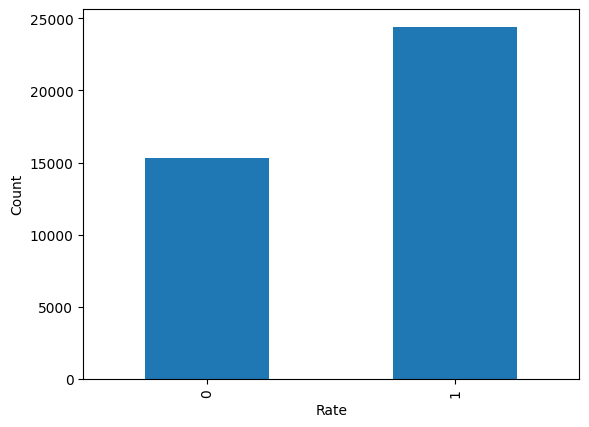

In [9]:
df.groupby(['Normal_Rate']).size().plot(kind='bar',ylabel='Count', xlabel='Rate');

In [10]:
#This is not necessary, but I want a balanced data. There are several ways to do this, but I want to do this.
counts = df.groupby(['Normal_Rate']).size()
drop_count = counts.values[1] - counts.values[0]
df.drop(index=(random.choices(df.index[df['Normal_Rate'] == 1].to_list(), k=drop_count)), inplace=True)
df.reset_index()

,index,Comment,Rate,Seller,Date,Normal_Rate
0,2,On numara urun,5,PRIME ONLINE,2023-10-17,1
1,6,Kızım için aldım çok memnun kaldı bu fiyata süper,5,ÇobanTech,2023-10-05,1
2,9,kulak da durması bir miktar sıkıntı bel ki de ...,5,LiderTekno-Bilisim,2023-09-23,1
3,19,Kaliteli uygun fiyatlı ancak kargo çok yavaş,5,dogadan her şey,2023-09-08,1
4,21,Biraz daha küçük olabilirdi,5,darty elektronik,2023-09-05,1
...,...,...,...,...,...,...
32137,103696,Sağ kulaklıkta hiçbir sıkıntı yok sol kulaklık...,1,Cep Ekspress,2019-08-08,0
32138,103697,Tutarsız yorumlara sebep olan bir ürün sanıyor...,2,Hepsiburada,2019-08-03,0
32139,103698,ürünün sarj aleti yeri kutuda mevcut olup için...,2,Hepsiburada,2019-07-31,0
32140,103699,sol kulaklıktan gelen ses kesilip duruyor heps...,1,Hepsiburada,2019-07-31,0


In [11]:
#Preproces can be run with stemmer or without it. It works without stemmer by default. 
#Appying stemmer, increases preprocess time, but decreases model accuracy and model training time.
#For future, with better stemmer or lemmetizer, model can be improved. 
df['Text'] = df['Comment'].apply(preproces)
df[['Comment', 'Text', 'Normal_Rate']]

,Comment,Text,Normal_Rate
2,On numara urun,numara urun,1
6,Kızım için aldım çok memnun kaldı bu fiyata süper,kızım aldım memnun kaldı fiyata süper,1
9,kulak da durması bir miktar sıkıntı bel ki de ...,kulak durması bir miktar sıkıntı bel benim kul...,1
19,Kaliteli uygun fiyatlı ancak kargo çok yavaş,kaliteli uygun fiyatlı ancak kargo yavaş,1
21,Biraz daha küçük olabilirdi,biraz küçük olabilirdi,1
...,...,...,...
103696,Sağ kulaklıkta hiçbir sıkıntı yok sol kulaklık...,sağ kulaklıkta hiçbir sıkıntı yok sol kulaklık...,0
103697,Tutarsız yorumlara sebep olan bir ürün sanıyor...,tutarsız yorumlara sebep olan bir ürün sanıyor...,0
103698,ürünün sarj aleti yeri kutuda mevcut olup için...,ürünün sarj aleti yeri kutuda mevcut olup için...,0
103699,sol kulaklıktan gelen ses kesilip duruyor heps...,sol kulaklıktan gelen ses kesilip duruyor heps...,0


In [12]:
df.drop(df.index[df['Text'] == ''], inplace=True)
model_df = df[['Text','Normal_Rate']]
model_df

,Text,Normal_Rate
2,numara urun,1
6,kızım aldım memnun kaldı fiyata süper,1
9,kulak durması bir miktar sıkıntı bel benim kul...,1
19,kaliteli uygun fiyatlı ancak kargo yavaş,1
21,biraz küçük olabilirdi,1
...,...,...
103696,sağ kulaklıkta hiçbir sıkıntı yok sol kulaklık...,0
103697,tutarsız yorumlara sebep olan bir ürün sanıyor...,0
103698,ürünün sarj aleti yeri kutuda mevcut olup için...,0
103699,sol kulaklıktan gelen ses kesilip duruyor heps...,0


# Model Training

In [13]:
train, test = train_test_split(model_df, test_size=0.10, random_state=42)
train_x, train_y = train['Text'], train['Normal_Rate']
test_x, test_y = test['Text'], test['Normal_Rate']

In [14]:
train_y.value_counts()

Normal_Rate
1    15139
0    13787
Name: count, dtype: int64

In [15]:
tfid = TfidfVectorizer()

In [16]:
train_x_vector = tfid.fit_transform(train_x)
test_x_vector = tfid.transform(test_x)

In [17]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfid.get_feature_names_out())

,aaa,aaaa,aaaaaa,aac,aadece,aag,aaçılmıyor,abartarak,abartilacak,abartiyor,...,şıkır,şıkırtı,şımarık,şımdı,şımdıde,şırıl,șarz,șiddetle,șuan,ṣarj
87315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
models = ['SVC', 'DecisionTree', 'LogisticRegression', 'Naive Bayes']
model_scores = []
run_times = []


start_time = time.time()
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(svc.score(test_x_vector, test_y))

start_time = time.time()
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(dec_tree.score(test_x_vector, test_y))

start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(log_reg.score(test_x_vector, test_y))

start_time = time.time()
MNb = MultinomialNB()
MNb.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(MNb.score(test_x_vector, test_y))


chime.success()


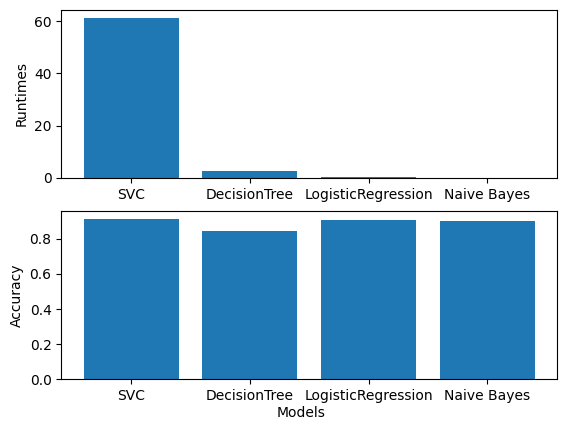

In [19]:
x = np.arange(0, len(models), 1);
fig, ax = plt.subplots(nrows=2, ncols=1)

plt.xticks(x, models);
ax[0].bar(models, run_times);
ax[0].set_ylabel('Runtimes');
plt.sca(ax[0]);
plt.xticks(x, models);

ax[1].bar(models, model_scores);
ax[1].set_ylabel('Accuracy');
plt.sca(ax[1]);
plt.xticks(x, models);

fig.text(0.5, 0.04, 'Models', ha='center', va='center');

In [20]:
run_times[3]

0.0049741268157958984

In [21]:
conf_mat_dec_tree = confusion_matrix(test_y, log_reg.predict(test_x_vector))
conf_mat_dec_tree

array([[1413,  137],
       [ 166, 1499]])

In [22]:
conf_mat_dec_tree = confusion_matrix(test_y, MNb.predict(test_x_vector))
conf_mat_dec_tree

array([[1382,  168],
       [ 155, 1510]])

<Axes: >

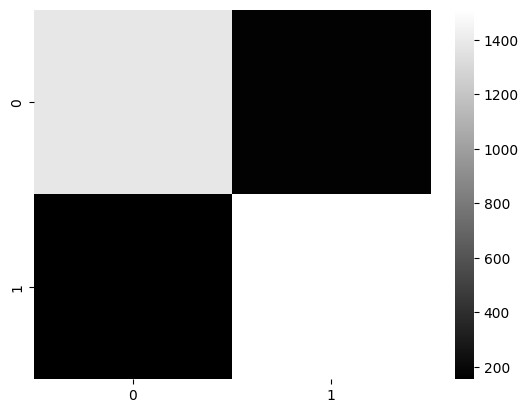

In [23]:
sns.heatmap(conf_mat_dec_tree, cmap='gray')

In [24]:
run_times

[61.27346205711365,
 2.7512028217315674,
 0.294543981552124,
 0.0049741268157958984]

In [25]:
model_scores

[0.9085536547433903,
 0.8441679626749611,
 0.9057542768273716,
 0.8995334370139969]

In [26]:
# For MultinomialNB, alpha is 1.0 by default.
opt = BayesSearchCV(
    MultinomialNB(),
    {'alpha': Real(1e-6, 1e+6, prior='log-uniform')},
    random_state=42)
opt.fit(train_x_vector, train_y)

BayesSearchCV(estimator=MultinomialNB(), random_state=42,
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')})

In [27]:
print("val. score: %s" % opt.best_score_)
print("best params: %s" % opt.best_params_)
print("test score: %s" % opt.score(test_x_vector, test_y))


val. score: 0.8960451971662294
best params: OrderedDict([('alpha', 1.8543350668235166)])
test score: 0.9010886469673406


In [28]:
opt.optimizer_results_

[          fun: -0.8960451971662294
             x: [1.8543350668235166]
     func_vals: [-8.878e-01 -5.234e-01 ... -8.227e-01 -8.601e-01]
       x_iters: [[0.08341564384216595], [11185.625288472094], [0.21776603694820984], [5607.275056505338], [3932.2516133086], [643.1854566491933], [25.406936492978463], [3.317697704417197], [292237.4271599055], [1.10551257524209e-06], [0.00017729125737724494], [0.0033914266318647718], [1.1951388073164376e-05], [8.409214695216157], [0.8856840390872973], [0.018455887335822995], [1.6759336548482187], [0.0007867670584518212], [0.5387649919706414], [3.3266154050790984e-06], [1.4042571452270018], [2.376401833286725], [1.0310694767304363], [64.99914644153664], [4.827280143424323e-05], [4.5060539647740265], [0.7220076403025173], [1.8649913844452795], [1.8543350668235166], [1.5344272524149396], [2.038410579309617], [0.039728875531497045], [0.007885657920737945], [1.4496659135081205], [1.8810497603169583], [998388.872832996], [14.095198834894804], [2.434136896

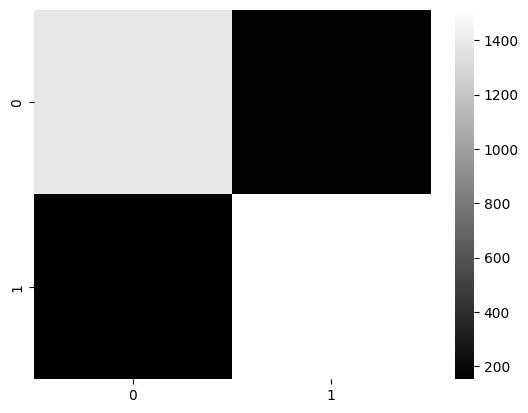

In [29]:
sns.heatmap(confusion_matrix(test_y, opt.predict(test_x_vector)), cmap='gray');

In [30]:
confusion_matrix(test_y, opt.predict(test_x_vector))

array([[1384,  166],
       [ 152, 1513]])